In [1]:
using Random,Distributions,Plots,Profile,LinearAlgebra,StatsBase

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
σ=1.0
nd = Normal(0.0, σ/2)

Normal{Float64}(μ=0.0, σ=0.5)

In [4]:
s = rand(nd,(100000,2))
@time c1 = [ ComplexF64(r...) for r in eachrow( s ) ];

  0.122734 seconds (1.03 M allocations: 36.431 MiB, 9.45% gc time)


In [5]:
@time c2 = [ ComplexF64(r...) for r in eachrow( rand(nd,(100000,2)) ) ];

  0.058097 seconds (852.68 k allocations: 28.508 MiB)


In [6]:
@time c3 = [ ComplexF64(r...) for r in eachcol( rand(nd,(2,100000)) ) ];

  0.111930 seconds (1.00 M allocations: 36.100 MiB, 8.30% gc time)


In [7]:
s = rand(nd,(100000,2))
@time c4 = [ ComplexF64(s[i,:]...) for i=1:size(s,1) ];

  0.135154 seconds (987.64 k allocations: 32.803 MiB, 6.86% gc time)


In [8]:
cov(c1)

0.4977102592272651

In [9]:
cov(c1,c2)

0.002017854932801053 + 7.463795999175533e-5im

In [10]:
cor(c1,c2)

0.004041394493940847 + 0.00014948618735984349im

In [11]:
@time s=randn(ComplexF64,1000);
println("cor = ",cor(s)," cov =",cov(s))
println(length(s))

  0.000031 seconds (1 allocation: 15.750 KiB)
cor = 1.0 cov =1.0230777682223815
1000


In [44]:
snr=range(0.0, stop=60.0, length=200);
C = log.(2, 1 .+ snr);

In [4]:
plot(snr,C, size=(900,250))
xlabel!("SNR [.]")
title!("Channel Capacity bits/complex sample")

LoadError: UndefVarError: snr not defined

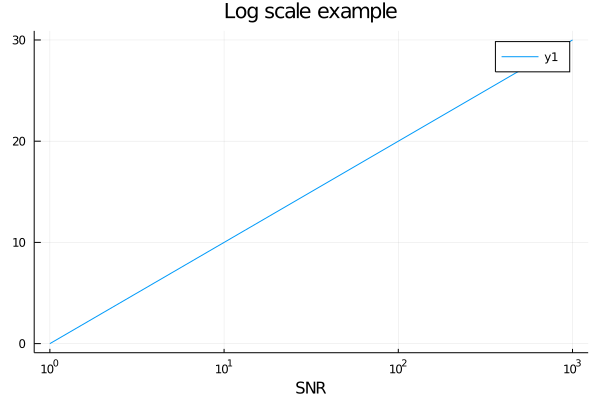

In [5]:
plot(1:1000,10log10.(1:1000))
xaxis!("SNR",:log10)
title!("Log scale example")

  2.818833 seconds (4.77 M allocations: 246.872 MiB, 1.42% gc time)


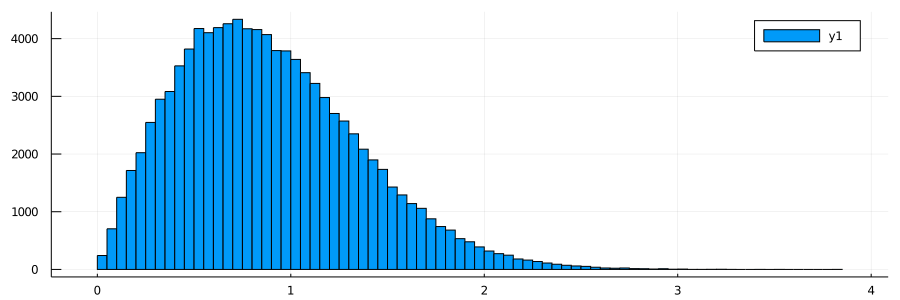

In [6]:
N=norm.(randn(ComplexF64,100000))
@time histogram(N, size=(900,300))

In [8]:
#@time histogram(ecdf(N))
ecdf(N)

ECDF{Array{Float64,1},Weights{Float64,Float64,Array{Float64,1}}}([0.004478346500831527, 0.007065078183207515, 0.007096394312785234, 0.008305155050868132, 0.010122513348104368, 0.010149699636066765, 0.010218452267667627, 0.01042156499935085, 0.010776822177373878, 0.012629041707861003  …  3.1437311263433383, 3.183178529303511, 3.1881006280663704, 3.2021037146416527, 3.2220814290700255, 3.238666850039996, 3.287149013726817, 3.426114446716172, 3.516221950053003, 3.833009884659842], Float64[])

  1.429404 seconds (2.53 M allocations: 143.316 MiB, 1.86% gc time)


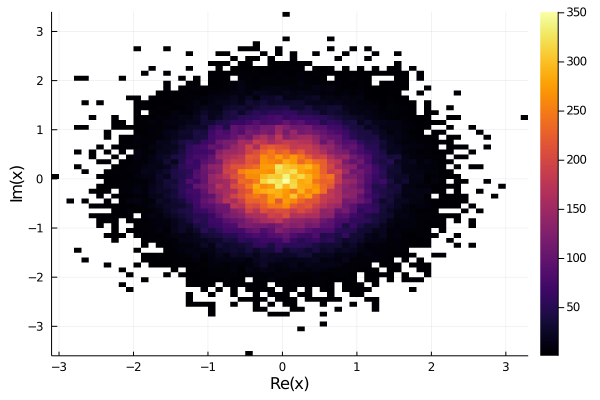

In [60]:
@time histogram2d(randn(ComplexF64,100000))